In [26]:
#   !pip install numpy

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv




In [28]:
width = 1
center = 45
maximum_num_iterations = 10
iterations = list(range(0, maximum_num_iterations, 1) )

# TN is constat at 30 minutes.
target_tn = float(30)

#   probability_limes = 50
probability_limes = 50
#   target_tso : TSO varies around and above 30 minutes ; 
#   degeneracy is expected at 45
target_tso = ["30","35", "40", "44", "45", "46", "50"]
#   target_tso = ["30"]

print(iterations)


#   testCompleteC45W1P50-35.anf
anf_file_name_anf = f'testCompleteC{center}W{width}P{probability_limes}-{target_tso[0]}.anf'
print("anf: ", anf_file_name_anf)

#   tC45W1P50-complete350.csv
#   tC45W1P50-complete351.csv
file_name_csv = f'tC{center}W{width}P{probability_limes}-complete{target_tso[0]}{0}.csv'
print(file_name_csv)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
anf:  testCompleteC45W1P50-30.anf
tC45W1P50-complete300.csv


In [29]:
# [ 'testCompleteC45W1P50-0-20240110-10:18:14-16368' ,' scalar' ,' J_Network.queuer' ,'jobsQueueLen:timeavg' ,  ,  , '0.83719745172292' ,,,,,,,, ]
r1 = "scalar"
r3 = "jobsQueueLen:timeavg"
#   import csv

jqTime_all_tsos = []
for tso_this_iter in range(0, len(target_tso), 1) :
    print(tso_this_iter)
    jQtime_same_tso = []
    for this_iteration in range(0, maximum_num_iterations, 1):
        
        file_name_csv = f'tC{center}W{width}P{probability_limes}-complete{target_tso[tso_this_iter]}{this_iteration}.csv'
        print(file_name_csv)

        # we take the time average of this iteration
        jQTime_avg = 0
        with open(f'../simulations/results/completes/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            for row in reader:
                #   r1 = "vector"
                #   r3 = "jobsQueueLen:vector"
                if row[1]==r1 and row[3]==r3:
                    rigaTarget = list(row)
                    #   print(rigaTarget)
                    #   print(rigaTarget[6])
                    jQTime_avg = rigaTarget[6]

        #   print(jQueueLen_vector)
        jQtime_same_tso.append(float(jQTime_avg))
    jqTime_all_tsos.append(jQtime_same_tso)

# now we have all tsos of all !
print(jqTime_all_tsos)

0
tC45W1P50-complete300.csv
tC45W1P50-complete301.csv
tC45W1P50-complete302.csv
tC45W1P50-complete303.csv
tC45W1P50-complete304.csv
tC45W1P50-complete305.csv
tC45W1P50-complete306.csv
tC45W1P50-complete307.csv
tC45W1P50-complete308.csv
tC45W1P50-complete309.csv
1
tC45W1P50-complete350.csv
tC45W1P50-complete351.csv
tC45W1P50-complete352.csv
tC45W1P50-complete353.csv
tC45W1P50-complete354.csv
tC45W1P50-complete355.csv
tC45W1P50-complete356.csv
tC45W1P50-complete357.csv
tC45W1P50-complete358.csv
tC45W1P50-complete359.csv
2
tC45W1P50-complete400.csv
tC45W1P50-complete401.csv
tC45W1P50-complete402.csv
tC45W1P50-complete403.csv
tC45W1P50-complete404.csv
tC45W1P50-complete405.csv
tC45W1P50-complete406.csv
tC45W1P50-complete407.csv
tC45W1P50-complete408.csv
tC45W1P50-complete409.csv
3
tC45W1P50-complete440.csv
tC45W1P50-complete441.csv
tC45W1P50-complete442.csv
tC45W1P50-complete443.csv
tC45W1P50-complete444.csv
tC45W1P50-complete445.csv
tC45W1P50-complete446.csv
tC45W1P50-complete447.csv
tC45

In [30]:
import pickle

In [31]:
with open('./saving', 'wb') as file_pi:
    pickle.dump(jqTime_all_tsos, file_pi)


In [32]:
with open('./saving', "rb") as file_pi:
    jqTime_all_tsos = pickle.load(file_pi)
    

In [33]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    return mean, confidence_interval

[0.83719745172292, 1.1974557311043, 1.1345605911614, 1.2329635045863, 1.1607152885466, 0.9515680823835, 1.035617043207, 0.91320521296936, 0.98241139154179, 1.0749137368915]
1.052060803411467
0.07683277516546061
[1.6938469590168, 3.1975796253439, 2.3245404087562, 2.5939337231137, 2.2432566842325, 1.9377220753517, 2.4717249818902, 2.1737696882832, 2.5175865393823, 1.7329687395809]
2.28869294249514
0.2635123947799168
[4.1784910385324, 16.512806373408, 4.9607809629541, 8.6613792602402, 6.0994234685026, 5.0168759342243, 6.9441595327355, 5.340721909741, 6.1158448024655, 5.5886539257711]
6.941913720857469
2.1074605253244916
[24.459124730909, 30.790826736356, 10.388575182666, 22.41878336751, 10.335026576593, 16.87235091813, 15.293433398731, 15.057809251379, 17.626298203284, 14.086063235044]
17.7328291600602
3.788103138859176
[18.880050801182, 46.107000152895, 16.232546357424, 24.3719147262, 6.8716303584805, 50.372074774301, 12.908787786848, 60.234308403789, 23.270984599108, 21.509324383799]
28

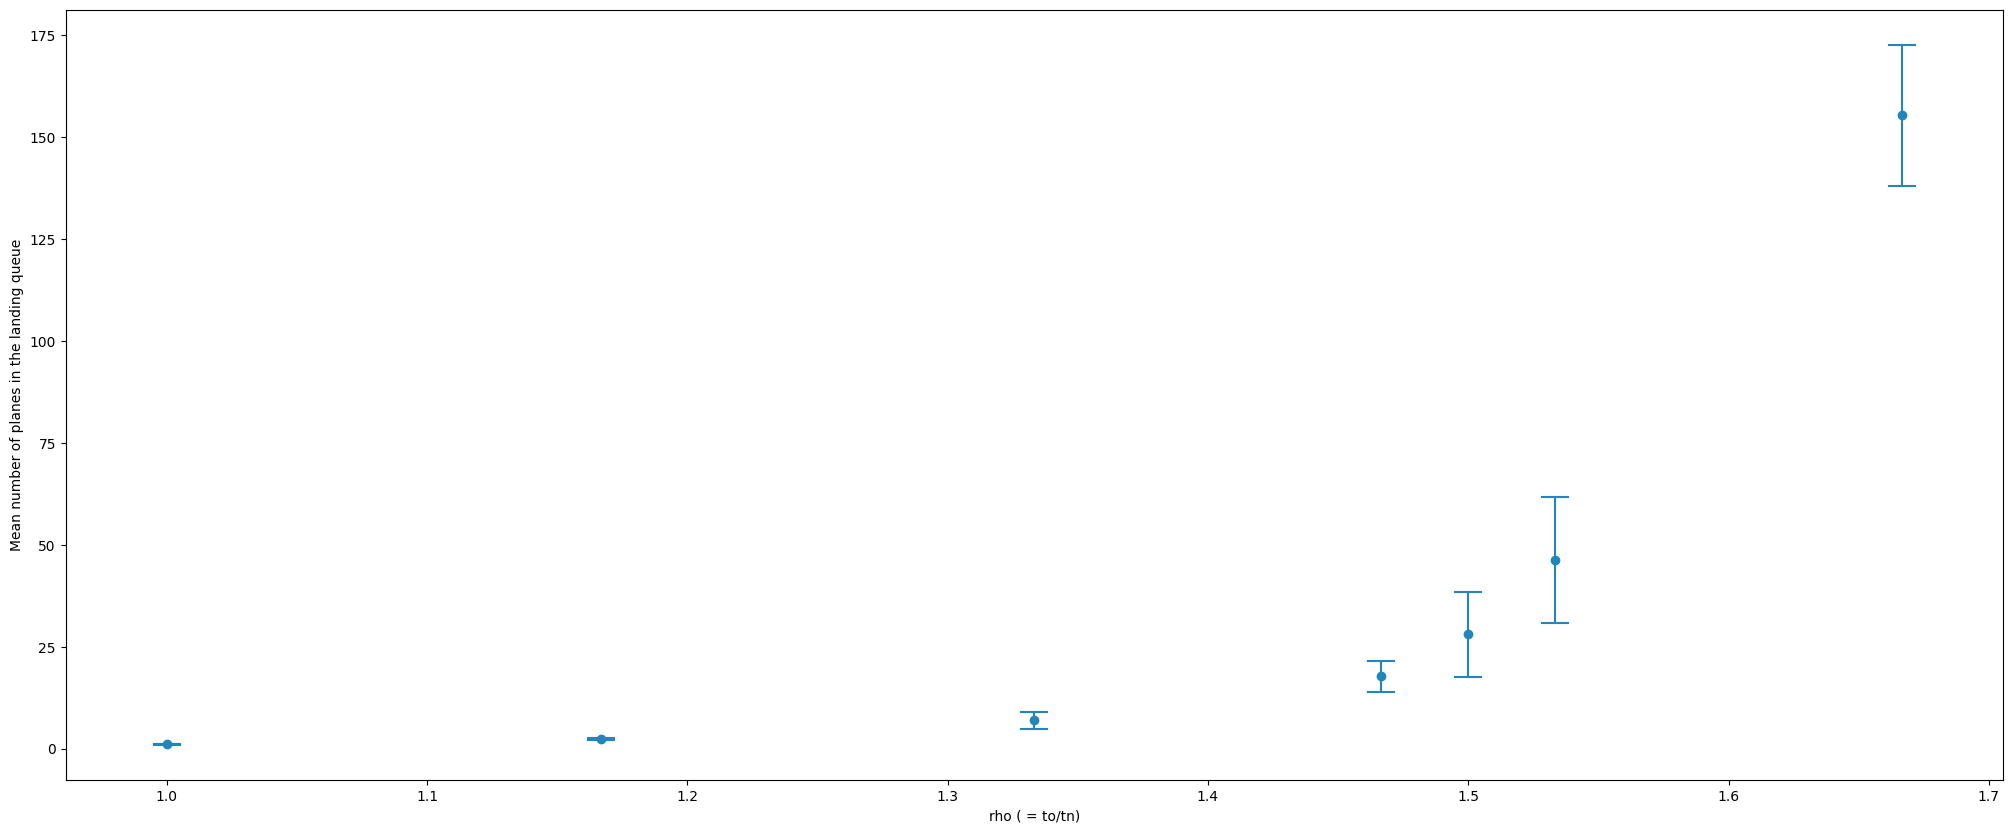

In [36]:

#   #   for i in jQueueLen_vector:
#   #       nums.append( int(i[0]))
#   #   print(nums)

plt.rcParams["figure.figsize"] = (25, 10)
for tso_this_iter in range(0, len(target_tso), 1) :
	this_tso_averages = jqTime_all_tsos[tso_this_iter]
	print(this_tso_averages)
	#	print("tipo di this_tso_averages : ", type(this_tso_averages))
	#	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
	#	print("tipo di target_tn : ", type(target_tn))
	#	#	tipo di this_tso_averages :  <class 'list'>
	#	#	tipo di this_tso_averages[0] :  <class 'float'>
	#	#	tipo di target_tn :  <class 'float'>
	this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
	print(this_mean)
	print(this_conf_int)

rho = np.linspace(0.05, 2, 100)
rho = rho 
#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
#	plt.legend(loc="upper left")


plt.ylabel("Mean number of planes in the landing queue")
plt.xlabel("rho ( = to/tn)")
plt.show()



